<a href="https://colab.research.google.com/github/rajatbutola/Initial-Practice-Learning/blob/master/Churn_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

In [3]:
data = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [204]:
df = pd.read_csv(io.StringIO(data['Churn_Modelling.csv'].decode('utf-8')))

In [205]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [206]:
print(df.shape)

(10000, 14)


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [208]:
df.duplicated().sum()

0

In [209]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [210]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [211]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [212]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [213]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **One hot encoding**

In [214]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [215]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [216]:
X_train.shape

(8000, 11)

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [218]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [219]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [220]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation=('sigmoid')))

In [221]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 11)                132       
                                                                 
 dense_22 (Dense)            (None, 11)                132       
                                                                 
 dense_23 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [223]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [224]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.5282 - accuracy: 0.7811 - val_loss: 0.4796 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7989 - val_loss: 0.4474 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8039 - val_loss: 0.4280 - val_accuracy: 0.8056
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8183 - val_loss: 0.4147 - val_accuracy: 0.8169
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8277 - val_loss: 0.4042 - val_accuracy: 0.8238
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8317 - val_loss: 0.3948 - val_accuracy: 0.8275
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8363 - val_loss: 0.3860 - val_accuracy: 0.8325

In [225]:
model.layers[0].get_weights()

[array([[-0.21992801, -0.1549882 ,  0.48788306, -0.03432488,  0.15099993,
         -0.48220363,  0.19797152,  0.5465101 , -0.6910434 , -0.11467782,
          0.03462647],
        [-0.35668918,  0.13275525,  0.30116683,  0.8300659 , -0.60291547,
         -0.52954435, -0.01723637, -0.11393231,  0.5577601 , -0.00562418,
         -0.13492808],
        [-0.5598312 , -0.12748219, -0.14957727, -0.07980132, -0.08409545,
          0.03601523, -0.37278616,  0.5928355 ,  0.5730455 , -0.21797907,
          0.22421288],
        [ 0.3090714 ,  0.4770084 , -0.35131153, -0.09979537, -0.03242019,
          0.06396836,  0.15606155,  0.00911633,  0.3136918 , -0.12741208,
         -0.4144262 ],
        [-0.00967925,  1.1021878 , -0.18936907, -0.18432575, -0.04133661,
         -0.4350638 ,  0.3375146 , -0.4488205 ,  0.2671422 , -1.3024938 ,
         -0.36567628],
        [-0.3836951 ,  0.04780525,  0.36234567,  0.06850181,  0.0333821 ,
         -0.10138179, -0.22027779,  0.4200985 ,  0.7825416 , -0.1061538

In [226]:
model.layers[2].get_weights()

[array([[ 1.1911103 ],
        [ 1.5803127 ],
        [-0.8523758 ],
        [-0.66400987],
        [-0.6854457 ],
        [-0.54857236],
        [-0.3187332 ],
        [-1.1344757 ],
        [-0.611439  ],
        [-1.3295888 ],
        [ 0.28302708]], dtype=float32),
 array([-0.00422778], dtype=float32)]

In [227]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [228]:
y_pred = np.where(y_log>0.5, 1, 0)

In [229]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8655

In [230]:
import matplotlib.pyplot as plt

In [231]:
history.history

{'loss': [0.5282328724861145,
  0.46239030361175537,
  0.4368746876716614,
  0.4208081066608429,
  0.40911275148391724,
  0.40019798278808594,
  0.39079761505126953,
  0.3828885555267334,
  0.3757409155368805,
  0.37022390961647034,
  0.3644738495349884,
  0.3606817126274109,
  0.35706400871276855,
  0.35341566801071167,
  0.3502514362335205,
  0.34802162647247314,
  0.3466837704181671,
  0.34426864981651306,
  0.34318864345550537,
  0.34196367859840393,
  0.341156929731369,
  0.34033527970314026,
  0.3392797112464905,
  0.3391683101654053,
  0.3379500210285187,
  0.3374039828777313,
  0.3369635343551636,
  0.3354358971118927,
  0.33568522334098816,
  0.3352705240249634,
  0.3347334563732147,
  0.3342559337615967,
  0.3336614668369293,
  0.33355894684791565,
  0.3329162299633026,
  0.3329722285270691,
  0.33254241943359375,
  0.33197009563446045,
  0.33209872245788574,
  0.331339031457901,
  0.33111900091171265,
  0.3314588963985443,
  0.33122608065605164,
  0.3306354582309723,
  0.330

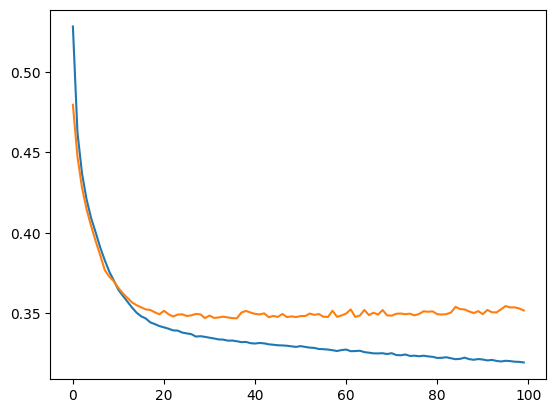

In [233]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

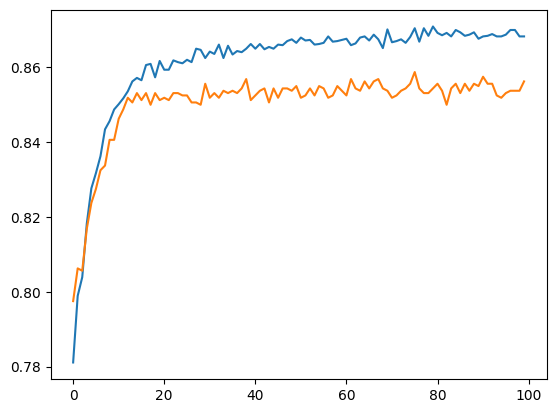

In [236]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])